# Price Competition - Airlines
Consider two companies competing on price. The goods (or services) the companies are providing homogenous services or goods - they are completely identical. A good example of such a market is the market for economy class airline tickets. Most consumers purchasing economy class airline tickets are only interested in getting from A to B, and usually have no loyalty or preference in the choice of airline. As a consequence, we assume that the consumer will purchase whichever airline ticket is cheapest. This would typically lead to very low, if any, profit margins for airlines. Moreover, a game in which the producers are competing solely on price is called a Bertrand game, or Bertrand competition.

## Demand Function Construction
First we need to have a demant for airline tickets. Data on how many tickets and and what price consumers are willing to buy those tickets is not readily available, so we will construct our own demand function. 

Consider a world where everything that exists are two airlines and 300 consumers. Each of the airlines have one airplane with 100 passenger seats each. Every consumers has some wealth, and since the only thing they can do in this world is to buy airline tickets they will if they can afford one. 

We will start by importing the `numpy` (Numerical Python) library, in order to make everything more efficient, and the plotting framework `pyplot` from the `matploblib` plotting library. `pyplot` provides a MATLAB-like plotting framework. There exists a *namespace* called `pylab` that combines `pyplot` with `numpy`. This can be convenient for interactive work, but for programming it is recommended that the namespaces be kept separate;

In [1]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt

Now that we have imported the tools we need we can declare some variables and construct our sample demand function. The demand function will simply consist of uniformly distributed values, generated by `numpy`'s `random.uniform()` function.

In [2]:
# Variables
no_of_consumers = 300
max_price = 100
min_price = 20

# Assigning random consumer price prefence
consumer_prices = np.random.uniform(max_price, min_price, no_of_consumers)

Before we can look at how the supply size of the market and how the market clears, we should study the demand function. A demand function is simply the number of  airline tickets (or any other good/service) that will be sold at a given price. This means that any consumer faced with a market price below or equal to their preferred price will buy a ticket.

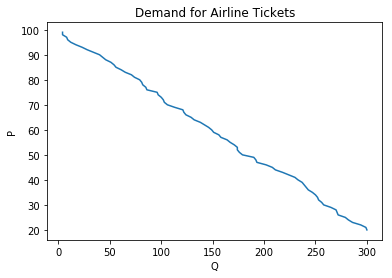

In [3]:
# Constructing (empty) demand function
demand = np.zeros(max_price - min_price)

# Counting consumers that will buy tickets at possible prices
i = 0
for price in range(min_price, max_price):

    demand[i] = sum(price <= bid for bid in consumer_prices)
    i += 1

# Plotting the demand curve
plt.plot(demand, range(min_price, max_price))
plt.xlabel("Q")
plt.ylabel("P")
plt.title("Demand for Airline Tickets")
plt.show()

We see that we get a fairly straight line, which is due to the uniformly distributed prices. Moreover, demand is falling as price increases, which is reasonable, and we consider ourselves happy with the demand function for now.

## Playing the Airline Game
Now that we have the demand for airline seats, it is up to the two airlines to set their prices and the market to allocate the tickets available and subject to the demand of consumers.

In order to make our Bertrand-style game somewhat flexible, we will create a function that takes the following parameters, or arguments; two different (or equal) prices, a demand function, and the capacity of the airlines. After we are done constructing this function, we have constructed a classical Bertrand Duopoly game.

The algorithm will be roughly as follows:
* We will iterate over demand function, starting at the highest price. If there are no seats left, we will break the iteration if there are noe more seats available.
* If both airlines have seats available, the consumer will buy tickets from whichever airline has the cheapest tickets, if they are cheap enough.
* If only one of the airlines have available seats the consumer will buy from this airline if the price is cheap enough.
* Revenue of the airlines is calculated
* Information about how tickets were allocated, as well as the revenue of each airline is printed.

Below is the function in its entirety;

In [4]:
# Function that determines the revenue and no of filled seats
def allocate_tickets(airline_1_price, airline_2_price, demand, seats=100):
    
    # Available seats variables
    seats_in_flight = seats
    airline_1_seats = seats_in_flight
    airline_2_seats = seats_in_flight
    total_seats = airline_1_seats + airline_2_seats
    
    for bid in demand:
    
        # Will stop searching for available seats if there are none.
        if (total_seats <= 0):
            break
        
        # Both airlines have empty seats
        if (airline_1_seats > 0 and airline_2_seats > 0):
        
            # Airline 1 is cheapest
            if (airline_1_price <= airline_2_price):
                
                # Transaction is done if the price is acceptable
                if (bid >= airline_1_price):
                    airline_1_seats -= 1
                    total_seats -= 1
                    
            # Airline 2 is cheapest
            else:
                
                # Transaction is done if the price is acceptable
                if (bid >= airline_2_price):
                    airline_2_seats -= 1
                    total_seats -=1
    
        # Only airline 1 has empty seats
        elif (airline_1_seats > 0 and airline_2_seats == 0):
        
            # Transaction is done if price is acceptable
            if (bid >= airline_1_price):
                airline_1_seats -= 1
                total_seats -= 1
    
        # Only airline 2 has empty seats
        elif (airline_2_seats > 0 and airline_1_seats == 0):
        
            # Transaction is done if price is acceptable
            if (bid >= airline_2_price):
                airline_2_seats -= 1
                total_seats -=1       
    
    # Calculating revenue of the airlines
    revenue_1 = (seats_in_flight - airline_1_seats)*price_1
    revenue_2 = (seats_in_flight - airline_2_seats)*price_2

    # Printing info
    print("{:12s} {:8s} {:8s}" .format("", "Airline 1", "Airline 2"))
    print("{:12s} {:8d} {:8d}" .format("Ticket Price", price_1, price_2))
    print("{:12s} {:8d} {:8d}" .format("Empty seats", airline_1_seats, airline_2_seats))
    print("{:12s} {:8d} {:8d}\n" .format("Revenue",  revenue_1, revenue_2))

Now that we have everything in place we can play around with the function, and play as many Bertrand Duopoly games as one could possible want. Here are three trial runs.

In [5]:
# Playing the airline game

# Game 1
price_1 = 75
price_2 = 80
allocate_tickets(price_1, price_2, consumer_prices)

# Game 2
price_1 = 90
price_2 = 80
allocate_tickets(price_1, price_2, consumer_prices)

# Game 3
price_1 = 66
price_2 = 50
allocate_tickets(price_1, price_2, consumer_prices)

             Airline 1 Airline 2
Ticket Price       75       80
Empty seats         4      100
Revenue          7200        0

             Airline 1 Airline 2
Ticket Price       90       80
Empty seats       100       21
Revenue             0     6320

             Airline 1 Airline 2
Ticket Price       66       50
Empty seats        49        0
Revenue          3366     5000



According to the theory, the one who sets the lowest price gets all the customers. The problem here is that the availability of tickets is also scarce. In the first game Airline 1 sets ticket price to 75 and Airline 2 sets the ticket price to 80. The outcome of the game is that Airline 1 has a nearly full plane, while Airline 2 sells no tickets at all. 

In this implementation of the Bertrand Duopoly we are free to set the prices we want, but what if we wanted to move away from the duopoly case and introduce a third airline? Or more?  One will likely end up reusing a lot of code in this script-like setup. A better way of doing things is with an object-oriented design.

## The Object-Oriented Airline Game
You could easily skip this paragraph if you know what Object-Oriented Desing is. In object-oriented programming (OOP) or design (OOD), one constructs classes as templates that represent real-life objects. An airline or airplane could easily be made into a class. All airlines have the same attributes, at least within this simple world in which we are imagining ourselves. Example of such attributes can be a name, a capacity and a price. A particular instance of the airline class would be an object, or class instance. I have constructed a module for playing the airline game in an object-oriented way. The program code to this module can be found [here](./airlines.py).

In [6]:
# Importing airline module
from airlines import *

Now all classis within the module should be imported. There are three classes available in the module `Airline`, `DemandFunction` and `AirlineMarket`. The use of each class is quite self-explanatory. The `Airline` class allows you to make `Airline` objects. 

In [7]:
# Creating new Airline object
british_airways = Airline()

# Setting attributes
british_airways.set_name("British Airways")
british_airways.set_capacity(100)
british_airways.set_price(50)

# Printing attributes
print("{:10s} {:>14s}".format("Airline:", british_airways.get_name()))
print("{:10s} {:>14d}".format("Capacity:", british_airways.get_capacity()))
print("{:10s} {:>14d}".format("Price:", british_airways.get_price()))

Airline:   British Airways
Capacity:             100
Price:                 50


Alternatively, all attributes of the class can be set when the object is constructed.

In [8]:
# Creating new Airline object
air_france = Airline("Air France", 120, 45)

# Printing attributes
print("{:10s} {:>14s}".format("Airline:", air_france.get_name()))
print("{:10s} {:>14d}".format("Capacity:", air_france.get_capacity()))
print("{:10s} {:>14d}".format("Price:", air_france.get_price()))

Airline:       Air France
Capacity:             120
Price:                 45


The `DemandFunction` class represents the consumers, or ticket buyers, in the market. It contains several methods for generating sample demand functions. 

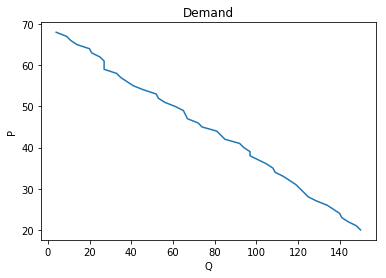

In [9]:
# Creating a DemandFunction object. Argument is no of consumers
airline_demand = DemandFunction(150)

# Generate uniformly distributed demand
airline_demand.generate_uniform(20, 70)

# Plot demand curve
airline_demand.plot_demand()

It is also possible to generate normally distributed consumer bidding prices with the `generate_normal()` method, or add whatever priced you would like with the `set_demand()` method.

Now that we have a demand function and a couple of airlines these can be added to an object of the `AirlineMarket` class.

In [10]:
# Creating AirlineMarket object
airline_market = AirlineMarket()

# Adding airlines and consumers to market
airline_market.add_airline(british_airways)
airline_market.add_airline(air_france)
airline_market.set_demand(airline_demand)

# Playing the game!
airline_market.allocate_tickets()

--------------------
No of consumers:  150 

Airline              Capacity    Seats left  Ticket price       Revenue
Air France                120            46            45          3330
British Airways           100           100            50             0
--------------------


We see that everyone that can afford to fly with Air France will do so, and no one will pick British Airways because their tickets have a higher price.

Now let us add a third airline. This is as easy as adding the two other airlines. While we are at it, let us increase the number of consumers and make the consumer prices normally distributed instead.

In [11]:
# Adding a third airline
ryanair = Airline("Ryanair", 80, 38)
airline_market.add_airline(ryanair)

# Changing demand function
airline_demand = DemandFunction(260)
mu = 50
sigma = 20
airline_demand.generate_normal(mu, sigma)
airline_market.set_demand(airline_demand)

# Playing the game!
airline_market.allocate_tickets()

--------------------
No of consumers:  260 

Airline              Capacity    Seats left  Ticket price       Revenue
Ryanair                    80             0            38          3040
Air France                120            20            45          4500
British Airways           100           100            50             0
--------------------


We see that the low cost carrier Ryanar fills its plane with ease, Air France's flight is partly filled being the second cheapest, while British Airways sells no tickets at all. Only when the Air France flight is full will the British Airways flight start to fill up as well. Furthermore, if we look at the revenue column we come to realise that even though the airline with the cheapest prices will fill their planes it is possible for an airline to make more money even though the plane is not completely full. However, the usual case in the airline industry is that the airlines will lower their prices to capture a larger market share. When they do, the comeptitors will usually follow suit leading to very low margins overall.

Let us see how the market looks like.

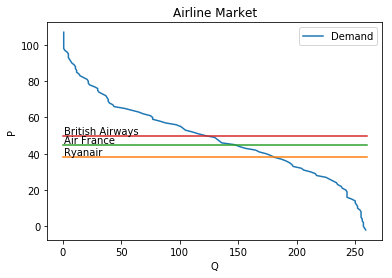

In [12]:
airline_market.plot_market()

This plot shows the demand curve, as well as the price of each airline as a straight line. The cross-sections of an airline price and the demand curve says something about how many tickets the airline can sell at that given price, if the capacity is large enough.

For the fun of it, let us lower the price of a British Airways ticket and see what happens.

In [13]:
# Setting BA tickets just below the price of AF tickets
british_airways.set_price(44)

airline_market.allocate_tickets()

--------------------
No of consumers:  260 

Airline              Capacity    Seats left  Ticket price       Revenue
Ryanair                    80             0            38          3040
British Airways           100             0            44          4400
Air France                120           120            45             0
--------------------


We see that now British Airways has almost the same turnover that Air France had earlier. What is more, now the tickets are cheap enough for all airlines to have some customers. Ryanair is still full, with the same price and revenue. The second cheapest, now British Airways, is completely full as well. This leaves a few for now the most expensive airline, Air France.